<a href="https://colab.research.google.com/github/WittmannF/covid19br-weekly-change/blob/master/Covid19_Weekly_Change_Deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [40]:
EPS = 1e-6

In [41]:
df = pd.read_csv(DEATHS_URL)

In [42]:
brazil = df[df['Country/Region']=='Brazil'].T[4:]

In [43]:
brazil.columns = ['confirmed']

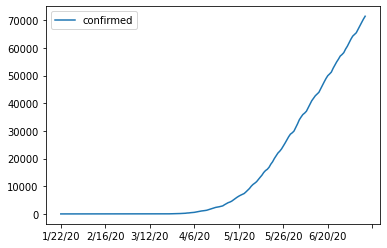

In [44]:
brazil.plot()

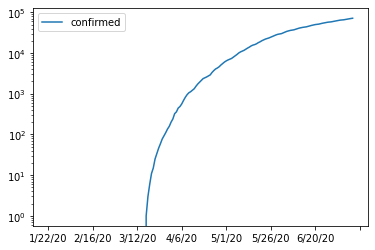

In [45]:
brazil.plot(logy=True)

In [46]:
brazil.shape

(172, 1)

In [47]:
weekday = pd.to_datetime(brazil.index).weekday

In [48]:
brazil['weekday'] = weekday

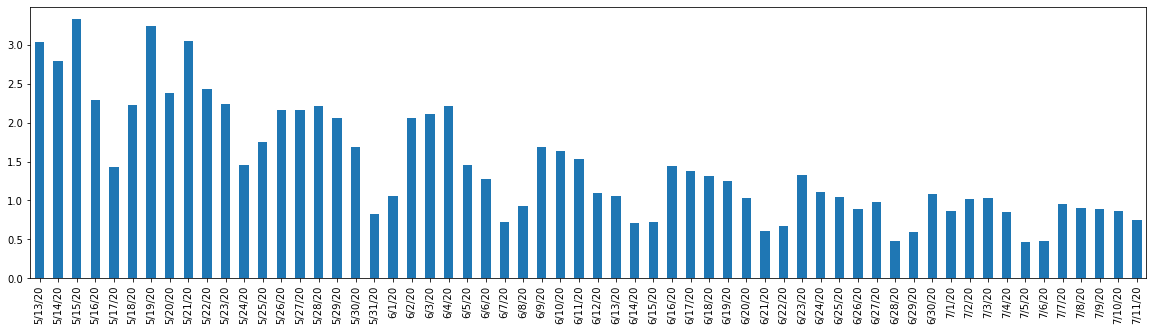

In [49]:
brazil['rolling_mean'] = brazil['confirmed'].rolling(window=2).mean().fillna(0)
brazil['stats']=(brazil['confirmed']-brazil['rolling_mean'])/(brazil['rolling_mean']+EPS)*100
brazil['stats'][-60:].plot.bar(figsize=(20,5))

In [50]:
brazil['new_deaths']=brazil['confirmed'][1:]-brazil['confirmed'][:-1].values

In [51]:
brazil

,confirmed,weekday,rolling_mean,stats,new_deaths
1/22/20,0,2,0.0,0,NaN
1/23/20,0,3,0.0,0,0
1/24/20,0,4,0.0,0,0
1/25/20,0,5,0.0,0,0
1/26/20,0,6,0.0,0,0
...,...,...,...,...,...
7/7/20,66741,1,66114.0,0.948362,1254
7/8/20,67964,2,67352.5,0.90791,1223
7/9/20,69184,3,68574.0,0.88955,1220
7/10/20,70398,4,69791.0,0.86974,1214


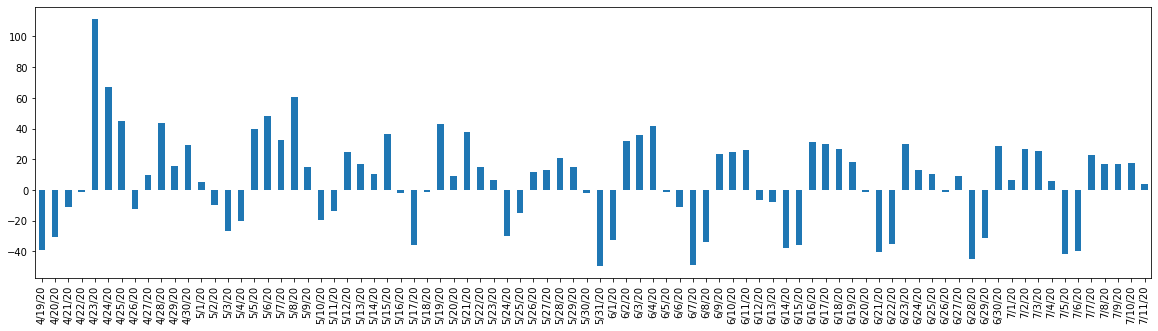

In [52]:
brazil['rolling_mean'] = brazil['new_deaths'].rolling(window=7).mean().fillna(0)
brazil['stats']=(brazil['new_deaths']-brazil['rolling_mean'])/(brazil['rolling_mean']+EPS)*100
brazil['stats'][-7*4*3:].plot.bar(figsize=(20,5))

In [53]:
stats = brazil['stats'][-7*4*3:].fillna(0).values.reshape(-1,7)
stats = pd.DataFrame(stats, columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

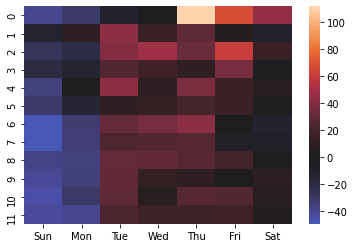

In [54]:
ax = sns.heatmap(stats, center=0)

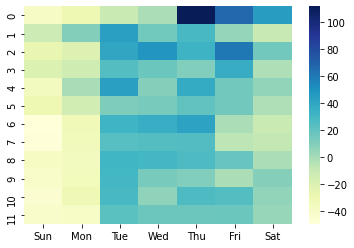

In [55]:
# plot using a color palette
sns.heatmap(stats, cmap="YlGnBu")

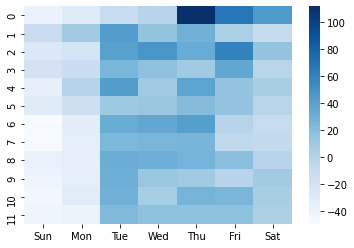

In [56]:
sns.heatmap(stats, cmap="Blues")


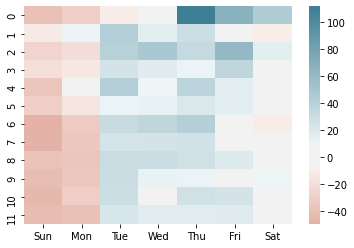

In [57]:
cmap = sns.diverging_palette(20, 220, sep=20, as_cmap=True)
sns.heatmap(stats, center=0, cmap=cmap)

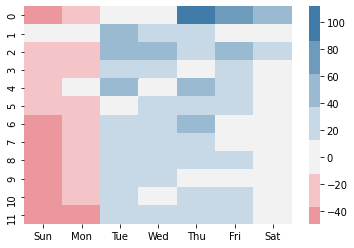

In [58]:
sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9))

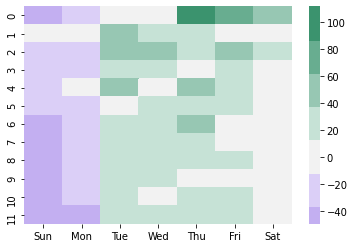

In [59]:
sns.heatmap(stats, center=0, cmap=sns.diverging_palette(275, 150, s=80, l=55, n=9))


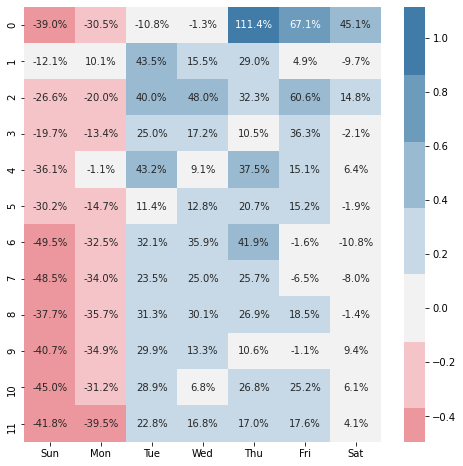

In [60]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(stats/100, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 annot=True,
                 fmt=".1%"

                 )

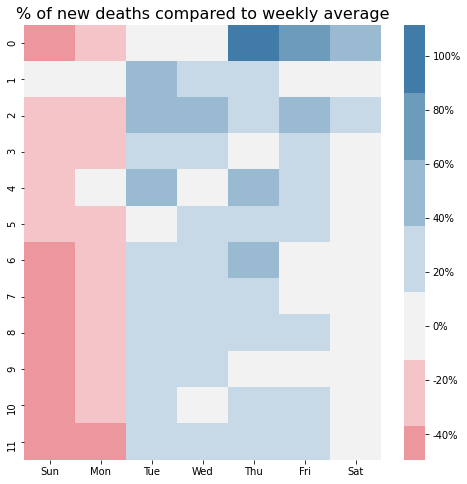

In [61]:
plt.figure(figsize=(8, 8))
plt.title('% of new deaths compared to weekly average', fontsize=16)
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'}
                 )


In [62]:
stats

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,-38.983051,-30.500397,-10.835401,-1.282051,111.442786,67.050544,45.096888
1,-12.116228,10.069444,43.467122,15.458381,29.009346,4.948301,-9.652367
2,-26.582278,-19.971056,40.000000,47.967480,32.349246,60.582524,14.839538
3,-19.720039,-13.439104,25.049746,17.218401,10.480349,36.319515,-2.117459
4,-36.096096,-1.057692,43.245201,9.129738,37.500000,15.133092,6.361203
5,-30.192425,-14.667674,11.395313,12.806054,20.650067,15.197657,-1.891218
6,-49.458484,-32.534035,32.107073,35.870504,41.887987,-1.580862,-10.822999
7,-48.536619,-33.958594,23.546552,25.042064,25.732096,-6.453984,-8.041237
8,-37.705395,-35.692308,31.294806,30.058565,26.899985,18.467583,-1.405733
9,-40.694310,-34.901532,29.902755,13.319672,10.577322,-1.098901,9.430505


In [63]:
brazil.index=pd.to_datetime(brazil.index)

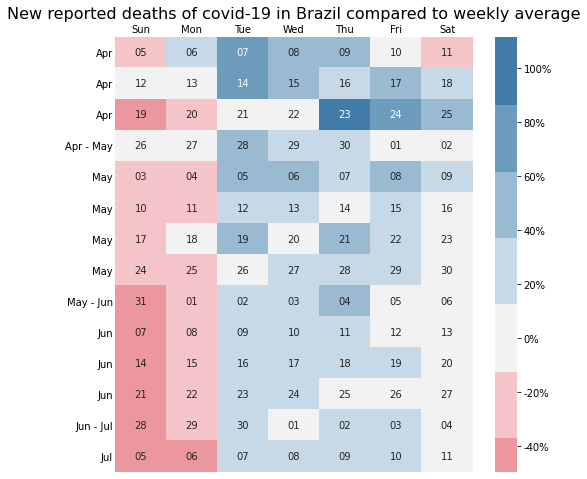

In [64]:
n_weeks = 4*3+2

stats = pd.DataFrame(brazil['stats'][-7*n_weeks:].fillna(0).values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


dates = pd.DataFrame(brazil['stats'][-7*n_weeks:].index.values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

month_label = dates.copy()
month_label = month_label.apply(lambda x: x.dt.strftime("%b"))
month_label = month_label.apply(lambda x: f"{x['Sun']} - {x['Sat']}" if x['Sun']!=x['Sat'] else x['Sun'], axis=1)
stats.index=month_label

dates = dates.apply(lambda x: x.dt.strftime("%d"))

plt.figure(figsize=(8, 8))
#plt.title('% of new Covid-19 deaths in Brazil compared to weekly average', fontsize=20, y=1.05, loc='center')
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'},
                 annot=dates.values,
                 fmt = ''
                 )
ax.set_title('New reported deaths of covid-19 in Brazil compared to weekly average', fontsize=16, y=1.2, loc='center')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, length=-1)

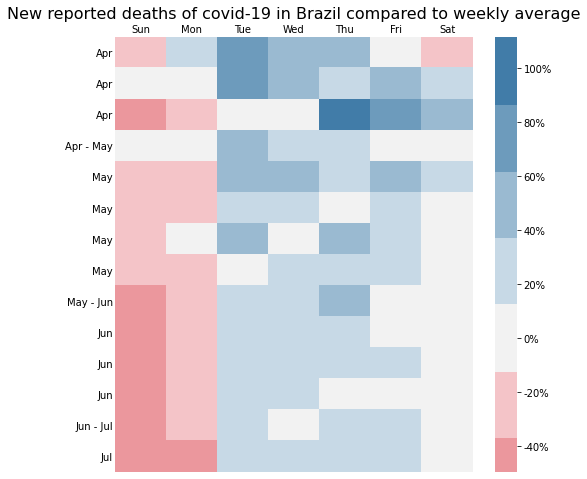

In [65]:
n_weeks = 4*3+2

stats = pd.DataFrame(brazil['stats'][-7*n_weeks:].fillna(0).values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


dates = pd.DataFrame(brazil['stats'][-7*n_weeks:].index.values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

month_label = dates.copy()
month_label = month_label.apply(lambda x: x.dt.strftime("%b"))
month_label = month_label.apply(lambda x: f"{x['Sun']} - {x['Sat']}" if x['Sun']!=x['Sat'] else x['Sun'], axis=1)
stats.index=month_label

dates = dates.apply(lambda x: x.dt.strftime("%d"))

plt.figure(figsize=(8, 8))
#plt.title('% of new Covid-19 deaths in Brazil compared to weekly average', fontsize=20, y=1.05, loc='center')
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'},
                 #annot=dates.values,
                 fmt = ''
                 )
ax.set_title('New reported deaths of covid-19 in Brazil compared to weekly average', fontsize=16, y=1.2, loc='center')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, length=-1)

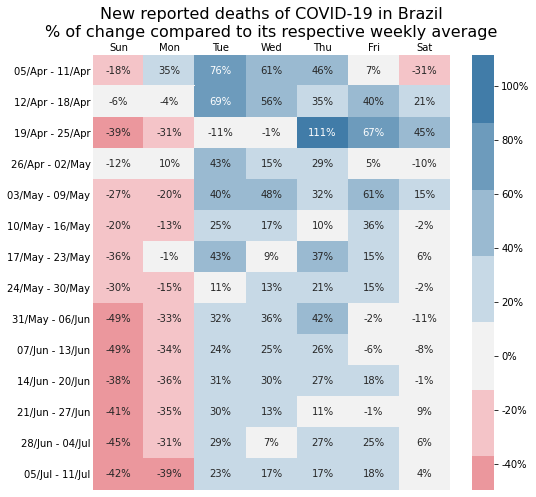

In [66]:
n_weeks = 4*3+2

stats = pd.DataFrame(brazil['stats'][-7*n_weeks:].fillna(0).values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


dates = pd.DataFrame(brazil['stats'][-7*n_weeks:].index.values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

month_label = dates.copy()
month_label = month_label.apply(lambda x: x.dt.strftime("%d/%b"))
month_label = month_label.apply(lambda x: f"{x['Sun']} - {x['Sat']}" if x['Sun']!=x['Sat'] else x['Sun'], axis=1)
stats.index=month_label

dates = dates.apply(lambda x: x.dt.strftime("%d"))

plt.figure(figsize=(8, 8))
#plt.title('% of new Covid-19 deaths in Brazil compared to weekly average', fontsize=20, y=1.05, loc='center')
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'},
                 annot=stats/100,
                 fmt = '.0%'
                 )
ax.set_title('New reported deaths of COVID-19 in Brazil\n% of change compared to its respective weekly average', fontsize=16, y=1.2, loc='center')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, length=-1)

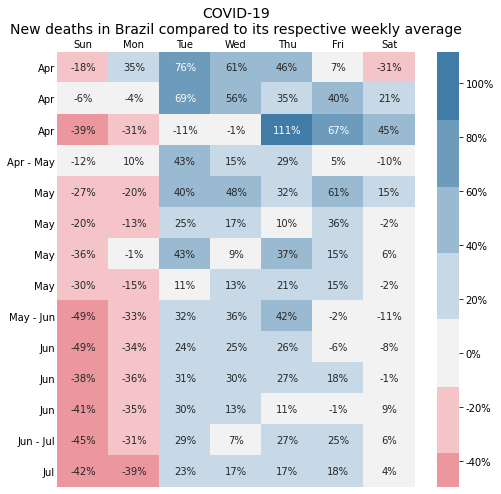

In [67]:
n_weeks = 4*3+2

stats = pd.DataFrame(brazil['stats'][-7*n_weeks:].fillna(0).values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


dates = pd.DataFrame(brazil['stats'][-7*n_weeks:].index.values.reshape(-1,7),
             columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

month_label = dates.copy()
month_label = month_label.apply(lambda x: x.dt.strftime("%b"))
month_label = month_label.apply(lambda x: f"{x['Sun']} - {x['Sat']}" if x['Sun']!=x['Sat'] else x['Sun'], axis=1)
stats.index=month_label

dates = dates.apply(lambda x: x.dt.strftime("%d"))

plt.figure(figsize=(8, 8))
#plt.title('% of new Covid-19 deaths in Brazil compared to weekly average', fontsize=20, y=1.05, loc='center')
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'},
                 annot=stats/100,
                 fmt = '.0%'
                 )
ax.set_title('COVID-19\nNew deaths in Brazil compared to its respective weekly average', fontsize=14, y=1.2, loc='center')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, length=-1)

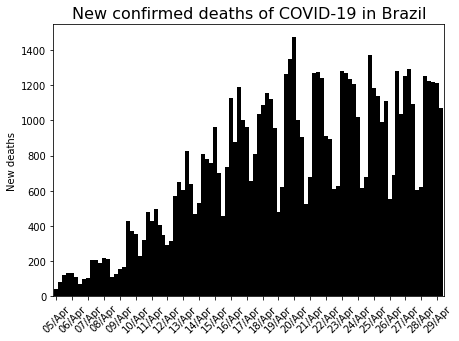

In [68]:
new_deaths = brazil['new_deaths'][-7*n_weeks:].copy()

new_deaths.index = new_deaths.index.strftime("%d/%b")
ax = new_deaths.plot.bar(figsize=(7,5), width=1, color='black')
_ = ax.set_xticks(ax.get_xticks()[::4])
ax.xaxis.set_tick_params(rotation=45)
ax.patch.set_facecolor('white')
#plt.xlabel('Notification Date')
plt.ylabel('New deaths')
_=plt.title('New confirmed deaths of COVID-19 in Brazil', fontsize=16)

In [69]:
brazil['new_deaths']

2020-01-22     NaN
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-07-07    1254
2020-07-08    1223
2020-07-09    1220
2020-07-10    1214
2020-07-11    1071
Name: new_deaths, Length: 172, dtype: object

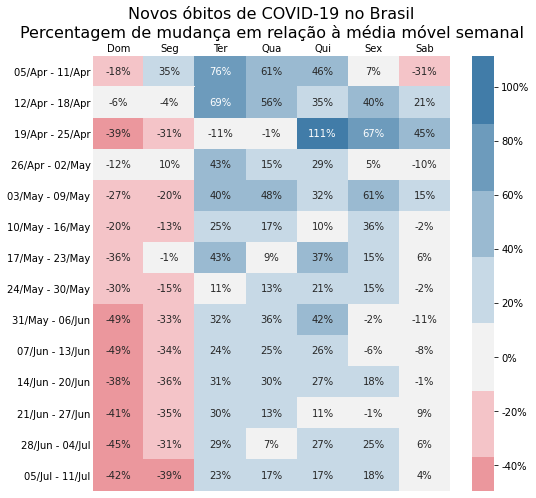

In [72]:
dias_semanas = ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab']
month_en_br = {'Apr': 'Abr',
               'May': 'Mai',
               'Jun': 'Jun',
               'Jul': 'Jul',}

n_weeks = 4*3+2

stats = pd.DataFrame(brazil['stats'][-7*n_weeks:].fillna(0).values.reshape(-1,7),
             columns = dias_semanas)


dates = pd.DataFrame(brazil['stats'][-7*n_weeks:].index.values.reshape(-1,7),
             columns = dias_semanas)

#month_label = dates.copy()
#month_label = month_label.apply(lambda x: x.dt.strftime("%b"))
#month_label = month_label.replace(month_en_br)
#month_label = month_label.apply(lambda x: f"{x['Dom']} - {x['Sab']}" if x['Dom']!=x['Sab'] else x['Dom'], axis=1)

month_label = dates.copy()
month_label = month_label.apply(lambda x: x.dt.strftime("%d/%b"))
month_label = month_label.apply(lambda x: f"{x['Dom']} - {x['Sab']}" if x['Dom']!=x['Sab'] else x['Dom'], axis=1)
stats.index=month_label


stats.index=month_label

dates = dates.apply(lambda x: x.dt.strftime("%d"))

plt.figure(figsize=(8, 8))
#plt.title('% of new Covid-19 deaths in Brazil compared to weekly average', fontsize=20, y=1.05, loc='center')
ax = sns.heatmap(stats, center=0, cmap=sns.diverging_palette(10, 240, n=9),
                 cbar_kws={'format': '%.0f%%'},
                 annot=stats/100,
                 fmt = '.0%'
                 )
ax.set_title('Novos óbitos de COVID-19 no Brasil\nPercentagem de mudança em relação à média móvel semanal', fontsize=16, y=1.2, loc='center')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, length=-1)

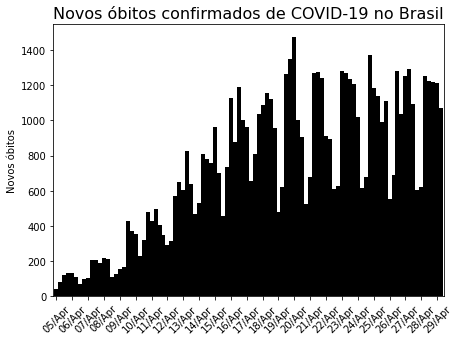

In [71]:
new_deaths = brazil['new_deaths'][-7*n_weeks:].copy()

new_deaths.index = new_deaths.index.strftime("%d/%b")
ax = new_deaths.plot.bar(figsize=(7,5), width=1, color='black')
_ = ax.set_xticks(ax.get_xticks()[::4])
ax.xaxis.set_tick_params(rotation=45)
ax.patch.set_facecolor('white')
#plt.xlabel('Notification Date')
plt.ylabel('Novos óbitos')
_=plt.title('Novos óbitos confirmados de COVID-19 no Brasil', fontsize=16)